# Задача 1

Файл «Данные к задаче 1.ods» содержит сведения о продолжительности грудного вскармливания в неделях в выборке рожениц.
Число после названия переменной соответствует номеру варианта (так, duration_4 — данные для четвёртого варианта).
Ваша цель — оценить среднюю продолжительность вскармливания.

PS: тут надо осторожно, я чуть не решил третий вариант, тк незаметил что они нумеруются не с начала группы.
я третий в AAAAAA но вариант у меня оказывается четвёртый.

In [47]:
arr = [20, 6, 13, 35, 19, 14, 24, 23, 43, 27, 4, 28, 16, 9, 24, 16, 4, 21, 18, 27, 21, 6]

## Пункт а
а) Рассчитайте 90% доверительный интервал для средней продолжительности, считая распределение признака нормальным.

Доверительный интервал у нас считается так: $$ \mathbb{P}\left( \bar{X} - t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}} \le \mu \le \bar{X} + t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}}\right) = 1-\alpha $$
где $t$ это квантиль распределения Студента, а $S$ корень из исправленной оценки дисперсии 

In [48]:
from scipy.stats import t
from IPython.display import display, Math

n = len(arr)
average = sum(arr)/n
variance = sum((e - average)**2 for e in arr)/(n-1)
S = variance**.5
alpha = 0.1
quantile = t.ppf(1-alpha/2, n-1)
left = average - quantile*S/n**.5
right = average + quantile*S/n**.5

display(Math(r"\alpha = %4g" % alpha))
display(Math(r"\bar{X} = %4g" % average))
display(Math(r"S = %4g" % S))
display(Math(r"t_{1-\frac{\alpha}{2},n-1} = %4g" % quantile))
display(Math(r"\mathbb{P}\left( %4g \le \mu \le %4g \right) = 90\%%" % (left, right)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Пункт б
б) Постройте график «квантиль-квантиль» и попробуйте понять, соответствует ли распределение времени вскармливания нормальному закону.

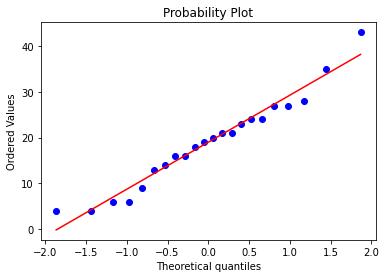

In [49]:
import pylab 
import scipy.stats as stats

stats.probplot(arr, dist="norm", plot=pylab)
pylab.show()

Если бы у нас действительно было нормальное распределение, то график выглидел бы как прямая.
Она тут даже нарисована: `scipy` такой хороший что всё делает за нас.
И этот график очень даже похож на эту прямую, и поэтому распределение у нас нормальное.

## Пункт в
в) Прочитайте ниже описание бутстрапа и рассчитайте этим методом $90\%$ доверительный интервал для средней продолжительности вскармливания, сгенерировав $1000$ перевыборок.

Тут вообще неочень понятно какойто доверительный интервал надо искать:
либо от нас хотят тотже интервал, что и в пункте а, только посчиатнный другим способом с выборочными квантилями,
либо нам нужно опять через распределение студента найти доверительнй интервал для результатов бутстрапа.
Я нашёл квантилями, потомучто так написано в условие.

> «Допустим, средние в перевыборках оказались распределены так, что квантили порядка $5\%$ и
> $95\%$ для средних оказались равны $8.7$ и $11.4$ соответственно. Тогда интервал $(8.7;\; 11.4)$ и
> будет 90% бутстраповским доверительным интервалом»

In [50]:
import random

def bootstrap(arr, n=10):
    перевыборка = [random.choice(arr) for i in range(n)]
    return sum(перевыборка)/len(перевыборка)

averages = [bootstrap(arr) for i in range(1000)]
averages.sort()
left = averages[50] # выборочные квантили ищутся просто индексовм из отсортировогого масива
right = averages[950]
display(Math(r"\mathbb{P}\left( %4g \le \mu \le %4g \right) \approx 90\%%" % (left, right)))

<IPython.core.display.Math object>

Бутстрапом у нас интервал получился чучуть шире чем обычным математическим методом.

## Пункт г
г) При выполнении предыдущего пункта вы получите $1000$ средних значений продолжительности вскармливания в перевыборках. Постройте гистограмму для этих значений.
Похоже ли распределение среднего в перевыборках на нормальное?

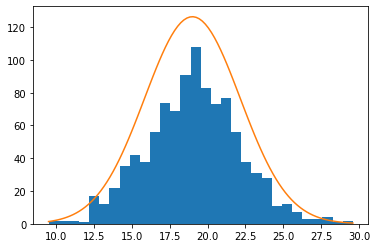

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.hist(averages, 30)

# сдесь мы пытаемся нарисовать ближайший гаусс к нашей гистограмме
# домножаем на 1000 мы потомучто гаусс это вероятность а на гистограмме у нас количества поподаний
x = np.linspace(min(averages), max(averages), 100)
bellCurve = norm.pdf(x, average, S**.5)*1000
plt.plot(x, bellCurve)

plt.show()